#  I- Régression Linéaire Multiple

On parle de Régression Linéaire Multiple lorsqu'on integre plusieures variables $x_1,x_2,....x_n$
 à notre modèle et que les choses commencent à devenir vraiment intéressantes. 
Le but de la Régression Linéaire Multiple est de rouver le meilleur ensemble  $\theta=(\theta_0,\theta_1,...., \theta_n)$ revient à  minimiser le coût global des erreurs unitaires qui se définit comme suit :
		$$  \min J(\theta)=\min_{\theta}\frac{1}{2m}\sum_{i=0}^{m} (h_\theta(x(i))-y(i))^2$$
avec $m$ est la taille du training set.
Avec $$h_\theta(x)=\theta_0+\theta_1 x_1+\theta_2x_2+.....+\theta_n x_n $$  


# 1-datasets

###   Créer un modèle à deux variables de régression linéaire multiple (n=2), 
 (x,y) avec $m$ exemples, $2$ variables 
		
$
			X=\begin{pmatrix} 
			x_1^{(1)}&	x_2^{(1)}&1\\                
			x_1^{(2)}&x_2^{(2)}&1\\ 
			..&..&..1\\ 
			..&..&..1\\ 
			x_1^{(m)}&x_2^{(m)}&1
			\end{pmatrix}\notag
			$
            
$       Y= \begin{pmatrix}
		Y^{(1)}\\ 
		Y^{(2)}\\
		.....\\
		.....\\
		Y^{(m)}
        \end{pmatrix}
        $
            
$           \theta=\begin{pmatrix} 
			\theta_1\\ 
			\theta_2\\ 
			\theta_0
			\end{pmatrix}
            $
	
  

#### 1-Générer de données aléatoires
#### 2-Afficher les données en 2D puis en 3D


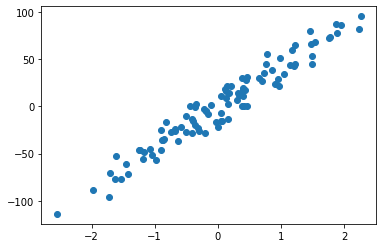

In [79]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x,y = make_regression(n_samples=100, n_features=1,noise=10)
plt.scatter(x,y)

# from mpl_toolkits.mplot3d import Axes3D
# ax =plt.axes(projection='3d')
# ax.scatter(x[:,0],y)

#### 3-redimentioner les matrices, créer la matrice X et $\theta$

In [80]:
import random
X=np.array([[x[i][0] , 1] for i in range(len(x))])
y=np.reshape(y,(100,1))
deta=np.reshape( np.array([random.randint(9,10),random.randint(8,10)]) ,(2,1))

#### 4-Implémenter le model de prédiction, Fonction cout, Gradients et Descente de Gradient

In [81]:
def cost_function(x,o,y):
    return (sum([o[1]*x[i][1]+o[0]*x[i][0] for i in range(len(x))]-y)**2)*(1/(2*len(x)))

def lineaire_prediction(x,deta):
    return x.dot(deta)

def descendent(o,alpha,x,y):
    return o-(grade_function(x,o,y)*alpha)

grade_function=lambda x,o,y: np.dot(np.transpose(x),lineaire_prediction(x,o)-y)*(1 / len(x))

In [82]:
# lineaire_prediction(X,deta)
# X.dot(deta)

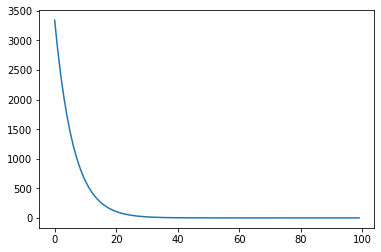

In [83]:
cost_history = []
deta_ = deta
for i in range(100):
    deta_ = descendent(deta_,0.1,X,y)
    cost_history.append(cost_function(X,deta_,y))
plt.plot([i for i in range(len(cost_history))],cost_history)

 #### 5-Afficher les valeurs de $\theta$


In [84]:
deta_

array([[42.61837702],
       [-0.81327768]])

### 6-Afficher les résultats de prédictions par rapport a notre Dataset ainsi que la courbe d'apprentissage

In [85]:
iteration=1000
new_deta_value=deta_
for i in range(iteration):
    new_deta_value=descendent(new_deta_value,0.01,X,y)

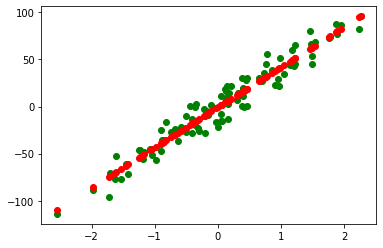

In [86]:
y_predict=lineaire_prediction(X,new_deta_value)
plt.scatter(X[:,0] , y , c='green')
plt.scatter(X[:,0] , y_predict , c='red')

### 7-Utiliser le coefficient de détermination pour évaluer la réelle performance et interpréter le resultats

In [87]:
def R2(x,y,o):
    return int( 1-( (sum(y-lineaire_prediction(x,o)))/(sum( (y-np.mean(y) )**2) ) ) )
R2(X,y_predict,new_deta_value)

1

#  II- Régression Polynomiale

Pour développer un modèle polynomial à partir des équations de la régression linéaire, il suffit d'ajouter des degrés de polynome dans les colonnes de la matrice. On développera un modèle qui vise à chercher la fonction de prédiction $$h_\theta(x)=\theta_0+\theta_1 x+\theta_2x^2+.....+\theta_n x^n $$  

# 1-datasets
	Pour n=2, on a 
$
			X=\begin{pmatrix} 
			x^{(1)}&	x^{2^{(1)}}&1\\                
			x^{(2)}&x^{2^{(2)}}&1\\ 
			..&..&..1\\ 
			..&..&..1\\ 
			x^{(m)}&x^{2^{(m)}}&1
			\end{pmatrix}\notag
			$
            
$       Y= \begin{pmatrix}
		Y^{(1)}\\ 
		Y^{(2)}\\
		.....\\
		.....\\
		Y^{(m)}
        \end{pmatrix}
        $
            
$           \theta=\begin{pmatrix} 
			\theta_1\\ 
			\theta_2\\ 
			\theta_0
			\end{pmatrix}
            $
	

 ### Refaire les mêmes étapes pour créer un model de prédiction par la régression polynomiale
  NB:modifier les valeurs de y pour rendre le dataset non-linéaire ( utiliser une fonction non linéaire)

In [88]:
# create dataset
x1=np.array([[1,2],[3,4],[5,6]])
y1=np.array([[1],[5],[7]])

In [89]:
# create matrix X and reshape y
X1=np.array([[x1[i][0],x1[i][1],1] for i in range(len(x1))])
y=np.reshape(y1,(3,1))
# create deta
deta1=np.reshape( np.array([random.randint(6,10),random.randint(8,10),random.randint(7,10)]) ,(3,1))
print(X1,"\n ------------ \n",y,'\n ------------ \n',deta1)

[[1 2 1]
 [3 4 1]
 [5 6 1]] 
 ------------ 
 [[1]
 [5]
 [7]] 
 ------------ 
 [[ 9]
 [10]
 [10]]


In [90]:
# create predict function
def predict_function(x,o):
    return x.dot(o)
# cost function 
# cost_function(X1,deta1,y)
# grdde
# grade_function(X1,deta1,y)
#descend
# descendent(deta1,0.01,X1,y)

In [91]:
# calcul new value of deta
new_deta_value=deta1
for i in range(1000):
    new_deta_value=descendent(new_deta_value,0.01,X1,y)

In [92]:
# calcul predect value
y_predect = lineaire_prediction(X1,new_deta_value)
y_predect

array([[1.72401589],
       [4.43728991],
       [7.15056394]])

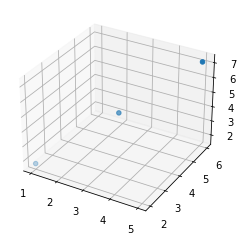

In [93]:
# show our dataset with prediction
from mpl_toolkits.mplot3d import Axes3D
ax =plt.axes(projection='3d')
ax.scatter(X1[:,0],X1[:,1],y_predect,cmap='Blues')

In [94]:
# from math import sqrt
# def cov(x,y):
# #         multi=0
# #         for i in range(len(x)):
# #             multi+=x.dot(y)- ( (np.mean(x))*(np.mean(y)) )
#         return (1/len(x))*sum(x.dot(y)- ( (np.mean(x))*(np.mean(y)) ))
    
# R=lambda x,y :cov(x,y)/(sqrt(np.var(x))*sqrt(np.var(y)))
# print(int(R(X1,y_predect)))

# III- Régressions linéaires avec Statsmodels et Scikit-Learn
 En utilisant les données du fichiers "mtcars.csv", on vise à prédire la consommation d'essence du véhicule "mpg" en fonction du poids du véhicule "wt" et la puissance du vehicule "hp" (horse power) en appliquant la régression linéaire multiple et polynomiale.

## 1-Regression  multiple en utilisant Scikit-Learn 
    1-importer les données 
    2-faites appel à "linear_model.LinearRegression" de Scikit-Learn 
    3-Vous faites la prédiction
    4-Afficher en 3d les résultats 
    5-Quel est la consommation d'essence du véhicule prédite avec le poids de 3.1 et une puissance de 120

In [95]:
import sklearn
import pandas as pd
from sklearn import linear_model

In [110]:
mydata=pd.read_csv("../LinearReg/mtcars.csv")
mydata.columns
predict1="wt"
predict2="hp"
x2=np.array(mydata.drop(["model","mpg","cyl","disp","qsec","vs","am","gear","carb","drat"],1))
y2=np.array(mydata["mpg"])
print(x2.shape,y2.shape)

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [104]:
model = linear_model.LinearRegression().fit(x2,y2)
print("deta1 = {}\tdeta2 = {}\tdeta0 = {}\nscore : {}".format(model.coef_[0],model.coef_[1],model.intercept_,model.score(x2,y2)))

deta1 = -0.031772946982160974	deta2 = -3.8778307424046794	deta0 = 37.2272701164472
score : 0.8267854518827914


In [105]:
model.predict(np.array([[120,3.1]]))

array([21.39324118])

ValueError: shapes (32,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

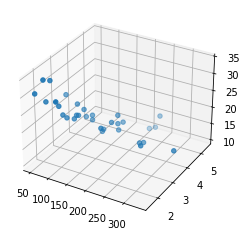

In [106]:
n_theta=np.reshape( np.array([model.coef_[1],model.coef_[0],model.intercept_]) ,(3,1))
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x2[:,0],x2[:,1],y2,cmap='Blues')
ax.scatter(x2[:,0],x2[:,1],lineaire_prediction(x2,n_theta),cmap='Blues')

## 2-Regression  multiple en utilisant statsmodels
    refaire les memes etatpes, comparer les résultas

In [1]:
import statsmodels.api as sm
x2 = sm.add_constant(x2)
res=sm.OLS(y2,x2).fit()
# print(res.summary())
ax =plt.axes(projection='3d')
ax.scatter(x2[:,0],x2[:,1],y2,cmap='Blues')
ax.scatter(x2[:,0],x2[:,1],res.predict(x2),cmap='Blues')

NameError: name 'x2' is not defined